In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy import ndimage
from skimage import measure
from skimage import util
from pylab import *

%matplotlib inline

## Input Processing

Shape: (828, 1184)


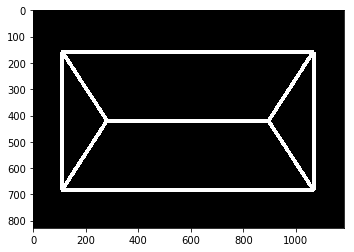

In [2]:
# Read in the image
image = cv2.imread('style/perfect.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

ret, thresh = cv2.threshold(image,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
image = util.invert(image)
plt.imshow(thresh, cmap='gray')
print('Shape:',image.shape)

Shape: (828, 1184)


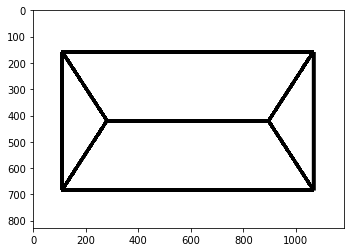

In [3]:
inverted_gray_line = util.invert(image)
plt.imshow(inverted_gray_line, cmap='gray')
print('Shape:',inverted_gray_line.shape)

## Extract feature shape from outline

Shape: (828, 1184)
The Number of Labeled Feature: 5


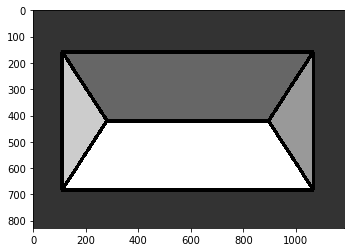

In [4]:
# Label the non-zero features in image 
labeled_array, num_features = ndimage.label(inverted_gray_line)
segmented_features = ndimage.find_objects(labeled_array)
# labeled_array = measure.label(inverted_gray_line)
labeled_array=np.float32(labeled_array)

plt.imshow(labeled_array*.2, cmap='gray')
print('Shape:',inverted_gray_line.shape)
print('The Number of Labeled Feature:', num_features)

In [5]:
# print('-'*120)
count = 1
# for region in segmented_features:
#     print('Sliced Region', count,':', region)
#     count +=1
# print('-'*120)    
shape = []
for i in range(2,num_features+1):
    region = list(np.where(labeled_array == i))
    shape.append(region)
    print('Segmented Region', count,':', region)
print(len(shape))

Segmented Region 1 : [array([168, 168, 168, ..., 413, 413, 413]), array([126, 127, 128, ..., 890, 891, 892])]
Segmented Region 1 : [array([181, 182, 183, ..., 658, 658, 659]), array([1060, 1060, 1059, ..., 1059, 1060, 1060])]
Segmented Region 1 : [array([183, 184, 184, ..., 656, 657, 658]), array([118, 118, 119, ..., 119, 118, 118])]
Segmented Region 1 : [array([429, 429, 429, ..., 674, 674, 674]), array([ 284,  285,  286, ..., 1051, 1052, 1053])]
4


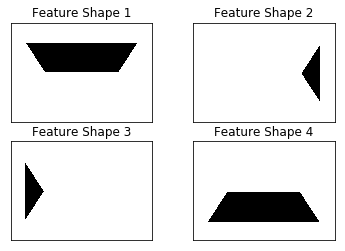

In [6]:
shape_dict = {}
fig = plt.figure()
for item in range(0, len(shape)):
    vec = {}
    for i, j in enumerate(shape[item]):
        vec[i] = j
    shape_dict[item] = zip(vec[0], vec[1])
    arr = np.zeros(inverted_gray_line.shape)
    for i in shape_dict[item]:
        arr[i] = 1
    arr = util.invert(arr)
    plt.subplot(2, 2, item+1)
    plt.imshow(arr, cmap='gray')
    plt.title('Feature Shape {}'.format(item+1)), plt.xticks([]), plt.yticks([])

In [7]:
# shape_dict = {}
# fig = plt.figure()
# for item in range(0, len(shape)):
#     vec = {}
#     for i, j in enumerate(shape[item]):
#         vec[i] = j
#     shape_dict[item]=vec
#     plt.subplot(2, 2, item+1)
#     plt.plot(shape_dict[item][0], shape_dict[item][1])
#     plt.title('Feature Shape {}'.format(item+1)), plt.xticks([]), plt.yticks([])

## Image moments calculation

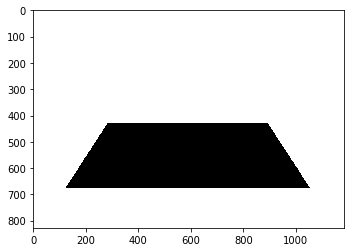

In [14]:
centroid = {}
x_centroid = []
y_centroid = []
count = 0
for i in range(4):
    arr = np.zeros(inverted_gray_line.shape)
    poly1 = zip(shape[i][0], shape[i][1])
    for i in poly1:
        arr[i] = 1
    arr = util.invert(arr)
    plt.imshow(arr, cmap='gray')
    plt.savefig('part.png')
#     plt.show()

    part = cv2.imread('part.png')
    part = cv2.cvtColor(part, cv2.COLOR_BGR2GRAY)
    
    part = util.invert(part)/255
    i_moments = cv2.moments(part)
    
    M00 = i_moments['m00']
    M10 = i_moments['m10']
    M01 = i_moments['m01']
    M20 = i_moments['m20']
    M02 = i_moments['m02']
    mu00 = M00
    mu20 = i_moments['mu20']
    mu02 = i_moments['mu02']
    mu11 = i_moments['mu11']

    centroid_x = M10/M00
    centroid_y = M01/M00

    mu20_p = mu20/mu00
    mu02_p = mu02/mu00
    mu11_p = mu11/mu00
    
#     x_centroid.append(centroid_x)
#     y_centroid.append(centroid_y)
#     centroid[count] = [centroid_x, centroid_y]
#     count += 1

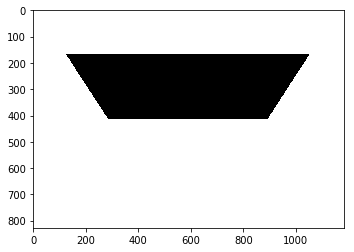

In [10]:
arr = np.zeros(inverted_gray_line.shape)
poly1 = zip(shape[0][0], shape[0][1])
for i in poly1:
    arr[i] = 1
arr = util.invert(arr)
plt.imshow(arr, cmap='gray')
plt.savefig('test.png')
plt.show()

test = cv2.imread('test.png')
test = cv2.cvtColor(test, cv2.COLOR_BGR2GRAY)

# test = cv2.imread('image_moment_shape_test/rectangle_45.png')
# test = cv2.cvtColor(test, cv2.COLOR_BGR2GRAY)
# plt.imshow(test, cmap='gray')

In [11]:
print(test)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


Area of binary image: $M_{00}$ 

Centroid, geometric center: {$\bar{x}$, $\bar{y}$} = $\begin{Bmatrix}\frac{M_{10}}{M_{00}},  \frac{M_{01}}{M_{00}}\end{Bmatrix}$

Information about image orientation can be derived by first using the second order central moments to construct a covariance matrix

$\mu_{00} = $M_{00}$

$\mu_{20}'= \frac{\mu_{20}}{\mu_{00}}=\frac{M_{20}}{M_{00}}-\bar{x}^2$

$\mu_{02}'= \frac{\mu_{02}}{\mu_{00}}=\frac{M_{02}}{M_{00}}-\bar{y}^2$

$\mu_{11}'= \frac{\mu_{11}}{\mu_{00}}=\frac{M_{11}}{M_{00}}-\bar{x}\bar{y}$

The covariance matrix of the binary image is:

cov$\begin{bmatrix}I(x,y) \end{bmatrix}$ = $\begin{bmatrix} \mu_{20}' &  \mu_{11}' \\ \mu_{11}' & \mu_{02}'\end{bmatrix}$

Orientation angle $\theta$: $\theta = \frac{1}{2}arctan \begin{pmatrix}\frac{2\mu_{11}'}{\mu_{20}'-\mu_{02}'} \end{pmatrix}$

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


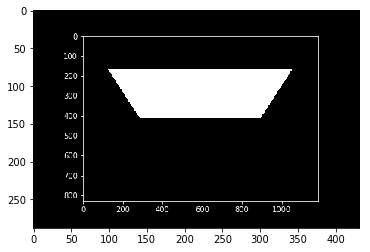

In [13]:
part = util.invert(test)/255  # normalize the pixel value from 0-255 to 0-1
plt.imshow(part, cmap='gray')
cv2.moments(part)
print(part)

In [10]:
i_moments = cv2.moments(part)
M00 = i_moments['m00']
M10 = i_moments['m10']
M01 = i_moments['m01']
M20 = i_moments['m20']
M02 = i_moments['m02']
mu00 = M00
mu20 = i_moments['mu20']
mu02 = i_moments['mu02']
mu11 = i_moments['mu11']

centroid_x = M10/M00
centroid_y = M01/M00

mu20_p = mu20/mu00
mu02_p = mu02/mu00
mu11_p = mu11/mu00

orientation = 0.5*np.arctan((2*mu11_p)/(mu20_p-mu02_p))
print('The orientation angle of given part is {} degree.'.format(orientation*180/np.pi))

The orientation angle of given part is -2.7819791141687067 degree.


In [124]:
cv2.HuMoments(i_moments).flatten()

array([ 4.37980712e-01,  5.65743341e-02,  5.69048898e-05,  1.01174910e-02,
       -7.61066518e-06, -1.06775200e-03, -1.00601567e-06])

In [113]:
orientation

-0.04855469526395917

In [114]:
print(mu20_p)
print(mu00)

4947.795831989939
14666.356862745108
